#### <p style="text-align: center;">L'ensemble de ce notebook est basé sur le travail de recherche de Cindy Mahalatchimy et du développement d'approches numériques protégées par copyright (Reckonect.com), dont <span style="color:red">la reproduction et l'utilisation en dehors des TP de formtion MIDIP de l'UAG, sont interdites</span>.</p>
#### <p style="text-align: center;">Si vous souhaitez développer vos connaissances sur les approches numériques en santé, contactez nous à sales@reckonect.com. Si vous souhaitez rejoindre notre équipe : recruitment@reckonect.com :-)</p>

In [27]:
import pandas as pd
import networkx as nx
from scipy import stats
import numpy as np
from V1_fct import *
pd.set_option('display.max_rows', None)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Étape 1 : Recréer un Kmap 

A faire de votre côté

## Étape 2 : Sélectionner une transition (2 boites reliées par une flèche) + définir les GOBP

In [32]:
GO_boite1 = ['GO:1905517', 'GO:0042116', 'GO:1990266', 'GO:0042119', 'GO:0030101', 'GO:0003823']                # exemple : GO_boite1 = ['GO:1905517', 'GO:0042116', 'GO:1990266', 'GO:0042119', 'GO:0030101', 'GO:0003823']
GO_boite2 = ['GO:0060510', 'GO:0010573', 'GO:0042531', 'GO:0002690', 'GO:0032755', 'GO:0002702', 'GO:0032946']  # exemple : GO_boite2 = ['GO:0060510', 'GO:0010573', 'GO:0042531', 'GO:0002690', 'GO:0032755', 'GO:0002702', 'GO:0032946']

## Étape 3 : Récupérer les protéines de chaque boite + Faire intersection

In [29]:
setP_boite1 = getPfromlGOBP(GO_boite1)
print(len(setP_boite1))

65


In [30]:
setP_boite2 = getPfromlGOBP(GO_boite2)
print(len(setP_boite2))

176


In [31]:
setPinCommon = setP_boite1.intersection(setP_boite2)
print(len(setPinCommon))

13


In [6]:
dataframe_lP_Prefname(setPinCommon)

,Id,UNIPROT,Pref name
0,13698,P60568,IL2
1,14782,P40933,IL15
2,12356,Q14116,IL18
3,11975,Q15399,TLR1
4,16970,P05112,IL4
5,14987,P35225,IL13
6,19116,O00206,TLR4
7,5645,Q96A25,TMEM106A
8,13971,P55085,F2RL1
9,17044,P04141,CSF2


## Étape 4 : Créer un réseau des protéines de l’intersection (visu network)

In [7]:
G = GraphPPi.subgraph(setPinCommon)

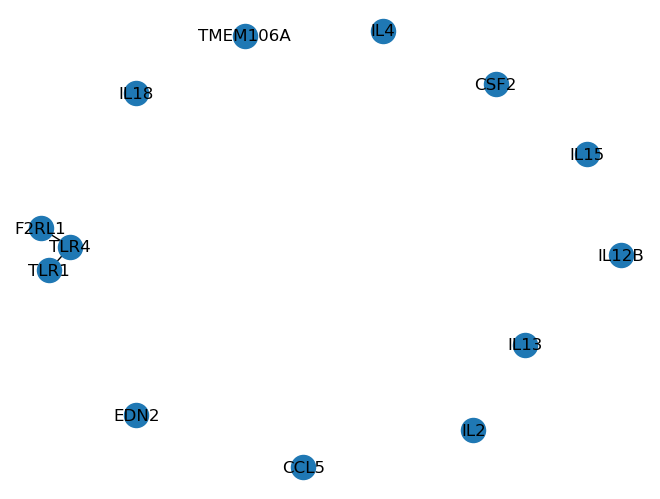

In [8]:
drawGraph(G)

In [9]:
GConnected = ConnectProteingraphPPi(G)

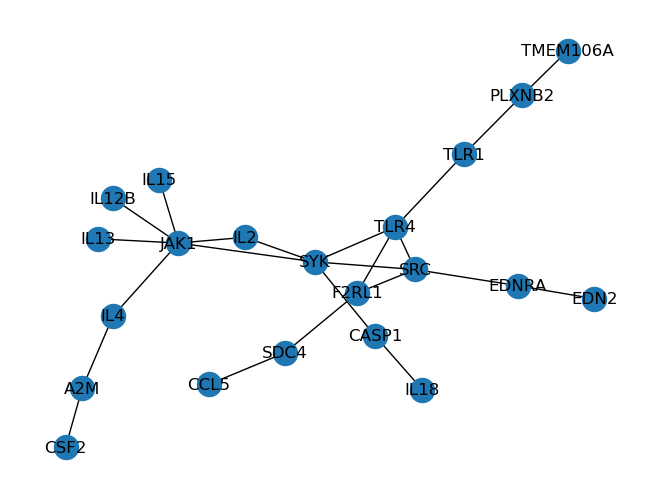

In [10]:
drawGraph(GConnected)

In [33]:
lIn = GConnected.nodes()
df = enrichissementGOBPfromP(lIn)
df           # df.sort_values('scoreInSample', ascending=False)

,Target Id,Target Name,fold,pValue Binomial,nbTotal,scoreInSample,lIn1Sample
0,45062,extrathymic T cell selection,596.6,1.676245e-03,1,1,[IL15]
1,90237,regulation of arachidonic acid secretion,596.6,1.676245e-03,1,1,[SYK]
2,32928,regulation of superoxide anion generation,596.6,1.676245e-03,1,1,[SYK]
3,2001286,regulation of caveolin-mediated endocytosis,596.6,1.676245e-03,1,1,[SRC]
4,2537,nitric oxide production involved in inflammato...,596.6,1.676245e-03,1,1,[TLR4]
5,2676,regulation of chronic inflammatory response,596.6,1.676245e-03,1,1,[CCL5]
6,1901247,negative regulation of lung ciliated cell diff...,596.6,1.676245e-03,1,1,[IL13]
7,1901251,positive regulation of lung goblet cell differ...,596.6,1.676245e-03,1,1,[IL13]
8,35780,CD80 biosynthetic process,596.6,1.676245e-03,1,1,[TMEM106A]
9,3058,hormonal regulation of the force of heart cont...,596.6,1.676245e-03,1,1,[EDN2]


## Étape 5 : Définir les drivers (Stat réseau)

In [25]:
dataframe_betweenness_centrality(GConnected).sort_values('betweenness_centrality', ascending=False)

,Id,UNIPROT,Pref name,betweenness_centrality
7,14635,P43405,SYK,0.610526
20,15485,P23458,JAK1,0.505263
9,19116,O00206,TLR4,0.355263
16,16108,P12931,SRC,0.276316
4,13971,P55085,F2RL1,0.189474
12,11975,Q15399,TLR1,0.189474
13,16970,P05112,IL4,0.189474
18,15222,P29466,CASP1,0.100000
17,17271,P01023,A2M,0.100000
8,15404,P25101,EDNRA,0.100000


In [34]:
dataframe_eigenvector_centrality(GConnected).sort_values('eigenvector_centrality', ascending=False)

,Id,UNIPROT,Pref name,eigenvector_centrality
7,14635,P43405,SYK,0.495861
9,19116,O00206,TLR4,0.400065
16,16108,P12931,SRC,0.399691
20,15485,P23458,JAK1,0.381919
4,13971,P55085,F2RL1,0.273373
0,13698,P60568,IL2,0.268958
18,15222,P29466,CASP1,0.167677
12,11975,Q15399,TLR1,0.136751
8,15404,P25101,EDNRA,0.135156
13,16970,P05112,IL4,0.130550


## Étape 6 : Faire enrichissement en chimique (FDA approved)

In [26]:
lIn = GConnected.nodes()
df = enrichissementCfromP(lIn)
df          # df.sort_values('scoreInSample', ascending=False)

,Target Id,Target Name,fold,pValue Binomial,nbTotal,scoreInSample,lIn1Sample
0,18,abrocitinib,103.5,0.009664,1,1,[JAK1]
1,3153,zirconium,103.5,0.009664,1,1,[IL18]
2,1138,famciclovir,103.5,0.009664,1,1,[CSF2]
3,1185,filgotinib,103.5,0.009664,1,1,[JAK1]
4,2909,ticarcillin,103.5,0.000093,2,2,"[IL2, CSF2]"
5,2269,piperazine,51.7,0.019235,2,1,[IL2]
6,1366,guselkumab,51.7,0.019235,2,1,[IL12B]
7,2497,risankizumab,51.7,0.019235,2,1,[IL12B]
8,2914,tildrakizumab,51.7,0.019235,2,1,[IL12B]
9,290,becaplermin,34.5,0.028713,3,1,[A2M]


## Étape 7 : Comprendre les hypothèses de repositionnement. Quels sont les effets secondaires et les indications ciblés par la drogue ?

In [15]:
getSideEventC(1138)

,Id,side event
0,68,Herpes Zoster
1,1348,Multiple Myeloma
2,2986,Peripheral Nervous System Diseases
3,106,"Anemia, Aplastic"
4,139,"Leukemia, Myeloid, Acute"
5,1484,Neutropenia
6,1676,Retinitis
7,911,Femoral Neuropathy
8,2958,"Tuberculosis, Hepatic"
9,2354,Spasm
